# 1. Load DataSet

Memuat data set yang diperlukan

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
data_jualan = pd.read_excel("data_penjualan.xlsx")

In [124]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


harus mengubah datetime menjadi formatnya(day-month-year)
jenis product-->object--->astype

# 2. Data Cleaning

In [125]:
# cek apakah ada missing value
data_jualan.isna().sum()

Tanggal          0
Jenis Produk    20
Jumlah Order    45
Harga           52
Total           54
dtype: int64

Tanggal 0 
Jenis produk 20---> modus()
jumlah Order 45 ---> mean()
Harga 52 ---> mean()
Total 54 ---> hasil kali dengan jumlah order*harga

In [126]:
data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace = True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_21096\3989563641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace = True)


In [127]:
data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace = True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_21096\4201359483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace = True)


In [128]:
data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace = True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_21096\3579728405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace = True)


In [129]:
data_jualan.loc[data_jualan["Total"].isna(),"Total"] = data_jualan["Jumlah Order"] * data_jualan["Harga"]

In [130]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tanggal       1076 non-null   object 
 1   Jenis Produk  1076 non-null   object 
 2   Jumlah Order  1076 non-null   float64
 3   Harga         1076 non-null   float64
 4   Total         1076 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.2+ KB


In [131]:
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], format="%d/%m/%Y")

In [132]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0


In [133]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 42.2+ KB


In [134]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0


# 3. Preprocessing Data

In [135]:
data_jualan["Jenis Produk"].astype(str)
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 42.2+ KB


In [136]:
data_jualan["Bulan"] = data_jualan["Tanggal"].dt.month_name()
data_jualan["Tahun"] = data_jualan["Tanggal"].dt.year
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


In [137]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
 5   Bulan         1076 non-null   object        
 6   Tahun         1076 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 54.8+ KB


In [138]:
data_jualan.describe()

,Tanggal,Jumlah Order,Harga,Total,Tahun
count,1076,1076.000000,1076.000000,1.076000e+03,1076.000000
mean,2023-04-09 15:48:50.855018752,1915.332687,1713.202148,2.348091e+06,2022.711896
min,2022-08-05 00:00:00,5.000000,100.000000,1.537600e+04,2022.000000
25%,2022-12-13 00:00:00,1000.000000,1000.000000,1.312500e+06,2022.000000
50%,2023-04-26 00:00:00,1000.000000,1500.000000,1.800000e+06,2023.000000
75%,2023-08-09 00:00:00,2000.000000,1800.000000,3.000000e+06,2023.000000
max,2023-11-15 00:00:00,40000.000000,99970.000000,2.149355e+07,2023.000000
std,NaN,2491.758284,3352.475721,1.731626e+06,0.453090


## 3.1 Filterisasi Data

In [139]:
data_jualan["Jenis Produk"].unique()

array(['Foodpak260', 'FoodpakMatte245', 'CraftLaminasi290', 'Dupleks310',
       'Ivory270', 'Kinstruk130', 'HVS', 'Dupleks350', 'CraftLaminasi',
       'GRESSPROFF', 'Ivory230+LaminasiDoff', '260Glossy',
       'CraftFoodpak290', 'Ivory230', 'Dupleks270', 'Kinstruk150',
       'FoodpakGlossy', 'Dupleks270Eplex', 'Ivory250', 'GreaseProof',
       'Foodpak295Matte', 'Foodpak260Glossy', 'Ivory300',
       'FoodpakGlossy260', 'Foodpak295', 'Dupleks400', 'FoodpakMatte295',
       'GreaseProof40', 'GreaseProofPlano', 'Dupleks270Laminating',
       'PTSariIndahPackagingIndustry', 'Craft310', 'Dupleks310P',
       'Craft290', 'Ivory250+Laminasi', 'StikerA3',
       'Ivory230+LaminasiAlas', 'CraftBiasa310', 'Ivory230+Laminating',
       'Ivory260Matte', 'Craft290Laminasi', 'Foodpak260Matte', 'Craft300',
       'DUPLEKS310', 'KertasSisaIvory300', 'CraftFoodpak290Laminasi',
       'Ivory350', 'FoodpakGlossy320', 'Craft270', 'PTSARIINDAH',
       'Dupleks350P', 'NCR', 'Craft275', 'Craft275Biasa',

In [140]:
filter_data = data_jualan.copy()
fd1 = filter_data[filter_data["Jenis Produk"]=="Dupleks270"]
fd1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
30,2022-08-15,Dupleks270,1000.0,1900.000000,1900000.0,August,2022
35,2022-08-18,Dupleks270,500.0,1713.202148,1100000.0,August,2022
83,2022-09-14,Dupleks270,1000.0,1800.000000,1800000.0,September,2022
203,2022-11-22,Dupleks270,1000.0,1800.000000,1800000.0,November,2022
252,2022-12-07,Dupleks270,1000.0,1500.000000,1500000.0,December,2022
271,2022-12-14,Dupleks270,1000.0,2000.000000,2000000.0,December,2022
344,2023-01-06,Dupleks270,1000.0,1500.000000,1500000.0,January,2023
451,2023-03-06,Dupleks270,2500.0,1700.000000,4250000.0,March,2023
505,2023-04-04,Dupleks270,1000.0,1600.000000,1600000.0,April,2023
564,2023-05-04,Dupleks270,1000.0,1400.000000,1400000.0,May,2023


In [144]:
filter_data2 = filter_data.copy()

In [145]:
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


In [146]:
filter_data2 = filter_data2[(filter_data2["Jenis Produk"]=="Dupleks270") & (filter_data2["Total"]>3000000)]

In [147]:
filter_data2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
451,2023-03-06,Dupleks270,2500.0,1700.0,4250000.0,March,2023
718,2023-07-10,Dupleks270,3000.0,1800.0,5400000.0,July,2023
719,2023-07-11,Dupleks270,3000.0,1400.0,4200000.0,July,2023
799,2023-08-07,Dupleks270,4000.0,1800.0,7200000.0,August,2023
800,2023-08-07,Dupleks270,4000.0,1400.0,5600000.0,August,2023
928,2023-09-20,Dupleks270,5000.0,1400.0,7000000.0,September,2023
1041,2023-11-06,Dupleks270,4000.0,1400.0,5600000.0,November,2023


filter_data3-->Dupleks310
filter_data3-->Dupleks310 and Total > 100.0000

In [ ]:
filter_data4-->HVS
filter_data4-->HVS and Jumlah Order > 1000

In [154]:
filter_data3 = filter_data.copy()

In [155]:
filter_data3

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


In [203]:
filter_data3_1= filter_data3[filter_data3["Jenis Produk"]=="Dupleks310"]
filter_data3_1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,August,2022
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,August,2022
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,August,2022
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,August,2022
...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,October,2023
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,November,2023
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,November,2023
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,November,2023


In [204]:
filter_data3_2= filter_data3[(filter_data3["Jenis Produk"]=="Dupleks310") & (filter_data["Total"]>100000)]
filter_data3_2

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_21096\3419749884.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data3_2= filter_data3[(filter_data3["Jenis Produk"]=="Dupleks310") & (filter_data["Total"]>100000)]


,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,August,2022
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,August,2022
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,August,2022
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,August,2022
...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,October,2023
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,November,2023
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,November,2023
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,November,2023


In [159]:
filter_data4 = filter_data.copy()

In [201]:
filter_data4_1 = filter_data4[filter_data4["Jenis Produk"]=="HVS"]
filter_data4_1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0,August,2022
62,2022-09-03,HVS,20000.0,250.000000,5000000.0,September,2022
128,2022-10-07,HVS,20000.0,250.000000,5000000.0,October,2022
197,2022-11-20,HVS,20000.0,250.000000,5000000.0,November,2022
256,2022-12-07,HVS,20000.0,250.000000,5000000.0,December,2022
345,2023-01-06,HVS,20000.0,250.000000,5000000.0,January,2023
431,2023-02-21,HVS,40000.0,250.000000,10000000.0,February,2023
547,2023-04-29,HVS,20000.0,250.000000,5000000.0,April,2023
570,2023-05-05,HVS,2000.0,250.000000,500000.0,May,2023
684,2023-06-26,HVS,20000.0,250.000000,5000000.0,June,2023


In [202]:
filter_data4_2 = filter_data4[(filter_data4["Jenis Produk"]=="HVS") & (filter_data4["Jumlah Order"]>1000)]
filter_data4_2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0,August,2022
62,2022-09-03,HVS,20000.0,250.000000,5000000.0,September,2022
128,2022-10-07,HVS,20000.0,250.000000,5000000.0,October,2022
197,2022-11-20,HVS,20000.0,250.000000,5000000.0,November,2022
256,2022-12-07,HVS,20000.0,250.000000,5000000.0,December,2022
345,2023-01-06,HVS,20000.0,250.000000,5000000.0,January,2023
431,2023-02-21,HVS,40000.0,250.000000,10000000.0,February,2023
547,2023-04-29,HVS,20000.0,250.000000,5000000.0,April,2023
570,2023-05-05,HVS,2000.0,250.000000,500000.0,May,2023
684,2023-06-26,HVS,20000.0,250.000000,5000000.0,June,2023


In [ ]:
filter_data2 = filter_data2[(filter_data2["Jenis Produk"]=="Dupleks270") & (filter_data2["Total"]>3000000)]

In [148]:
filter_data3=filter_data.copy()

In [ ]:
data_jualan_2022 = data_jualan[data_jualan["Tahun"]== 2022]
data_jualan_2023 = data_jualan[data_jualan["Tahun"]== 2023]

In [164]:
dj22 = data_jualan_2022
dj22

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
305,2022-12-15,CraftLaminasi290,2000.0,800.0,1600000.0,December,2022
306,2022-12-15,CraftFoodpak290,1500.0,875.0,1312500.0,December,2022
307,2022-12-15,Dupleks310,2000.0,1400.0,2800000.0,December,2022
308,2022-12-15,Craft275Biasa,1000.0,1000.0,1000000.0,December,2022


In [165]:
dj23 = data_jualan_2023
dj23

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
310,2023-01-01,Dupleks310,2000.0,1800.0,3600000.0,January,2023
311,2023-01-01,Ivory230,1000.0,1400.0,1400000.0,January,2023
312,2023-01-01,Dupleks310,2000.0,1650.0,3300000.0,January,2023
313,2023-01-01,Dupleks350,1000.0,2250.0,2250000.0,January,2023
314,2023-01-01,Dupleks400,1000.0,2250.0,2250000.0,January,2023
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


In [180]:
dj23

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
310,2023-01-01,Dupleks310,2000.0,1800.0,3600000.0,January,2023
311,2023-01-01,Ivory230,1000.0,1400.0,1400000.0,January,2023
312,2023-01-01,Dupleks310,2000.0,1650.0,3300000.0,January,2023
313,2023-01-01,Dupleks350,1000.0,2250.0,2250000.0,January,2023
314,2023-01-01,Dupleks400,1000.0,2250.0,2250000.0,January,2023
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_21096\662106771.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


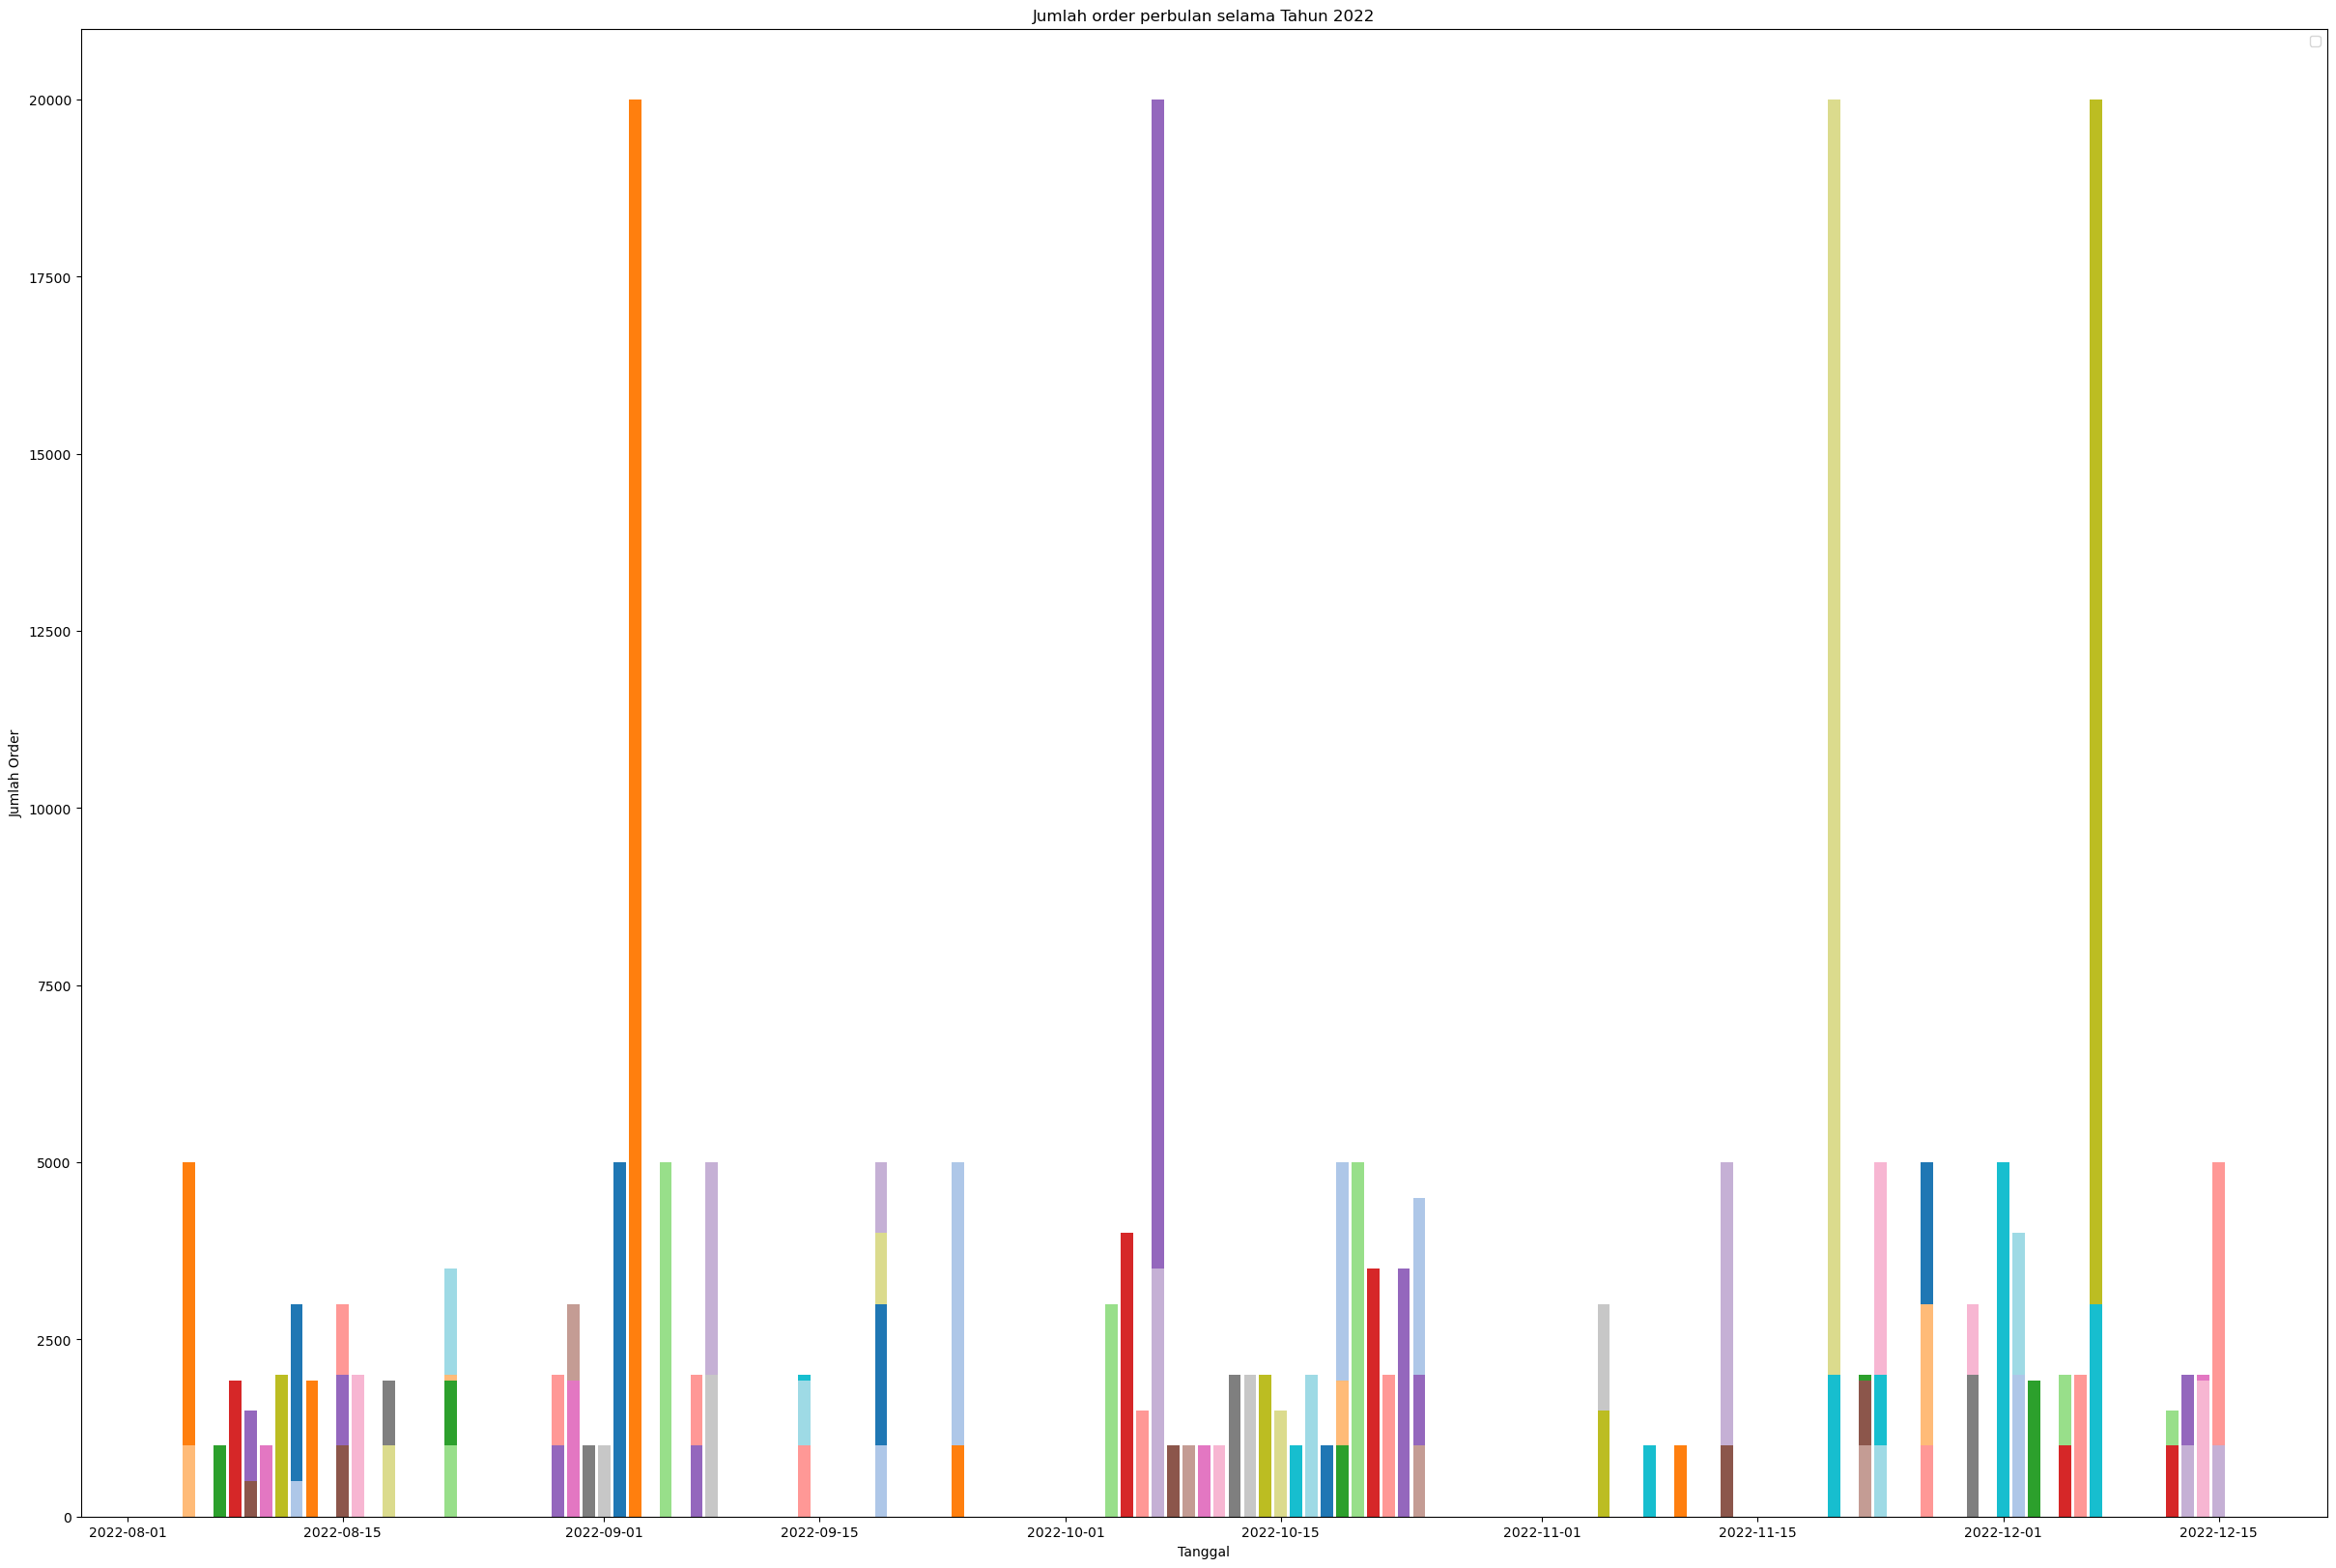

In [179]:
plt.figure(figsize=(30,20))
colors = plt.cm.tab20.colors
plt.bar(dj22["Tanggal"],dj22["Jumlah Order"],color=colors)
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Order")
plt.title("Jumlah order perbulan selama Tahun 2022")
plt.show()

## 3.2 Grouping

In [228]:
filter_data

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


In [229]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
 5   Bulan         1076 non-null   object        
 6   Tahun         1076 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 54.8+ KB


In [206]:
filter_data3_1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,August,2022
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,August,2022
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,August,2022
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,August,2022
...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,October,2023
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,November,2023
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,November,2023
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,November,2023


In [245]:
penghasilan2_periode_data3_1 = filter_data3_1.groupby("Bulan").agg(
    tanggal = ("Tanggal","max"),
    total_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum")
).reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [241]:
penghasilan2_periode_data3_1

,tanggal,total_order,total_pendapatan
Bulan,,,
January,2023-01-06,32500.000000,5.410000e+07
February,2023-02-09,3915.332687,7.500000e+06
March,2023-03-30,11500.000000,1.950000e+07
April,2023-04-30,10500.000000,1.790000e+07
May,2023-05-26,12000.000000,1.961320e+07
June,2023-06-22,13000.000000,1.990000e+07
July,2023-07-30,18915.332687,3.290000e+07
August,2023-08-29,59076.663434,1.048450e+08
September,2023-09-30,42415.332687,6.512500e+07


In [246]:
penghasilan2_periode_data3_1["Bulan"] = penghasilan2_periode_data3_1["tanggal"].dt.month_name()

In [247]:
penghasilan2_periode_data3_1

,tanggal,total_order,total_pendapatan,Bulan
Bulan,,,,
January,2023-01-06,32500.000000,5.410000e+07,January
February,2023-02-09,3915.332687,7.500000e+06,February
March,2023-03-30,11500.000000,1.950000e+07,March
April,2023-04-30,10500.000000,1.790000e+07,April
May,2023-05-26,12000.000000,1.961320e+07,May
June,2023-06-22,13000.000000,1.990000e+07,June
July,2023-07-30,18915.332687,3.290000e+07,July
August,2023-08-29,59076.663434,1.048450e+08,August
September,2023-09-30,42415.332687,6.512500e+07,September


In [233]:
filter_data3_2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
5,2022-08-08,Dupleks310,500.0,1900.0,950000.0,August,2022
11,2022-08-10,Dupleks310,500.0,1600.0,800000.0,August,2022
16,2022-08-11,Dupleks310,2000.0,1300.0,2600000.0,August,2022
19,2022-08-12,Dupleks310,1000.0,2200.0,2200000.0,August,2022
...,...,...,...,...,...,...,...
1024,2023-10-28,Dupleks310,1000.0,1700.0,1700000.0,October,2023
1037,2023-11-03,Dupleks310,2000.0,1600.0,3200000.0,November,2023
1054,2023-11-09,Dupleks310,1000.0,1500.0,1500000.0,November,2023
1057,2023-11-11,Dupleks310,1000.0,1900.0,1900000.0,November,2023


In [249]:
penghasilan2_periode_data3_2 = filter_data3_2.groupby("Bulan").agg(
    tanggal = ("Tanggal","max"),
    total_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum")
).reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [250]:
penghasilan2_periode_data3_2

,tanggal,total_order,total_pendapatan
Bulan,,,
January,2023-01-06,32500.000000,5.410000e+07
February,2023-02-09,3915.332687,7.500000e+06
March,2023-03-30,11500.000000,1.950000e+07
April,2023-04-30,10500.000000,1.790000e+07
May,2023-05-26,12000.000000,1.961320e+07
June,2023-06-22,13000.000000,1.990000e+07
July,2023-07-30,18915.332687,3.290000e+07
August,2023-08-29,59076.663434,1.048450e+08
September,2023-09-30,42415.332687,6.512500e+07


In [252]:
penghasilan2_periode_data3_2["Bulan"] = penghasilan2_periode_data3_2["tanggal"].dt.month_name()

In [253]:
penghasilan2_periode_data3_2

,tanggal,total_order,total_pendapatan,Bulan
Bulan,,,,
January,2023-01-06,32500.000000,5.410000e+07,January
February,2023-02-09,3915.332687,7.500000e+06,February
March,2023-03-30,11500.000000,1.950000e+07,March
April,2023-04-30,10500.000000,1.790000e+07,April
May,2023-05-26,12000.000000,1.961320e+07,May
June,2023-06-22,13000.000000,1.990000e+07,June
July,2023-07-30,18915.332687,3.290000e+07,July
August,2023-08-29,59076.663434,1.048450e+08,August
September,2023-09-30,42415.332687,6.512500e+07,September


In [215]:
filter_data4_1

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0,August,2022
62,2022-09-03,HVS,20000.0,250.000000,5000000.0,September,2022
128,2022-10-07,HVS,20000.0,250.000000,5000000.0,October,2022
197,2022-11-20,HVS,20000.0,250.000000,5000000.0,November,2022
256,2022-12-07,HVS,20000.0,250.000000,5000000.0,December,2022
345,2023-01-06,HVS,20000.0,250.000000,5000000.0,January,2023
431,2023-02-21,HVS,40000.0,250.000000,10000000.0,February,2023
547,2023-04-29,HVS,20000.0,250.000000,5000000.0,April,2023
570,2023-05-05,HVS,2000.0,250.000000,500000.0,May,2023
684,2023-06-26,HVS,20000.0,250.000000,5000000.0,June,2023


In [255]:
penghasilan2_periode_data4_1 = filter_data4_1.groupby("Bulan").agg(
    tanggal = ("Tanggal","max"),
    total_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum")
).reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [256]:
penghasilan2_periode_data4_1["Bulan"] = penghasilan2_periode_data4_1["tanggal"].dt.month_name()

In [257]:
penghasilan2_periode_data4_1

,tanggal,total_order,total_pendapatan,Bulan
Bulan,,,,
January,2023-01-06,20000.0,5000000.0,January
February,2023-02-21,40000.0,10000000.0,February
March,NaT,NaN,NaN,NaN
April,2023-04-29,20000.0,5000000.0,April
May,2023-05-05,2000.0,500000.0,May
June,2023-06-26,20000.0,5000000.0,June
July,NaT,NaN,NaN,NaN
August,2023-08-24,26500.0,7775000.0,August
September,2022-09-03,20000.0,5000000.0,September


In [219]:
filter_data4_2

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
8,2022-08-09,HVS,1500.0,1713.202148,1275000.0,August,2022
62,2022-09-03,HVS,20000.0,250.000000,5000000.0,September,2022
128,2022-10-07,HVS,20000.0,250.000000,5000000.0,October,2022
197,2022-11-20,HVS,20000.0,250.000000,5000000.0,November,2022
256,2022-12-07,HVS,20000.0,250.000000,5000000.0,December,2022
345,2023-01-06,HVS,20000.0,250.000000,5000000.0,January,2023
431,2023-02-21,HVS,40000.0,250.000000,10000000.0,February,2023
547,2023-04-29,HVS,20000.0,250.000000,5000000.0,April,2023
570,2023-05-05,HVS,2000.0,250.000000,500000.0,May,2023
684,2023-06-26,HVS,20000.0,250.000000,5000000.0,June,2023


In [258]:
penghasilan2_periode_data4_2 = filter_data4_2.groupby("Bulan").agg(
    tanggal = ("Tanggal","max"),
    total_order = ("Jumlah Order", "sum"),
    total_pendapatan = ("Total", "sum")
).reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [259]:
penghasilan2_periode_data4_2["Bulan"] = penghasilan2_periode_data4_2["tanggal"].dt.month_name()

In [260]:
penghasilan2_periode_data4_2

,tanggal,total_order,total_pendapatan,Bulan
Bulan,,,,
January,2023-01-06,20000.0,5000000.0,January
February,2023-02-21,40000.0,10000000.0,February
March,NaT,NaN,NaN,NaN
April,2023-04-29,20000.0,5000000.0,April
May,2023-05-05,2000.0,500000.0,May
June,2023-06-26,20000.0,5000000.0,June
July,NaT,NaN,NaN,NaN
August,2023-08-24,26500.0,7775000.0,August
September,2022-09-03,20000.0,5000000.0,September


In [261]:
penghasilan2_periode_data4_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           10 non-null     datetime64[ns]
 1   total_order       10 non-null     float64       
 2   total_pendapatan  10 non-null     float64       
 3   Bulan             10 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 480.0+ bytes


<function bar at 0x0000018E9BB7BC40>


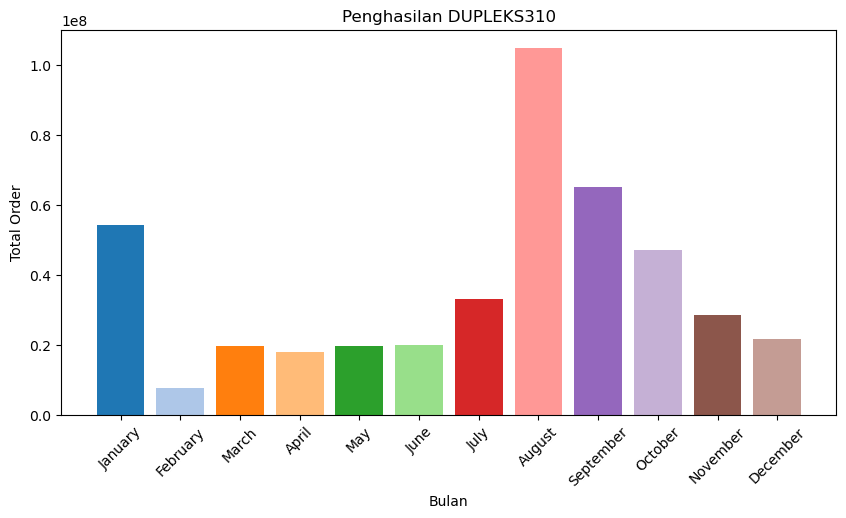

In [266]:
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data3_1.index,
        penghasilan2_periode_data3_1["total_pendapatan"],
        label = penghasilan2_periode_data3_1.index,
        color = colors[:len(penghasilan2_periode_data3_1)])
plt.title("Penghasilan DUPLEKS310")
plt.xlabel("Bulan")
plt.ylabel("Total Order")
plt.xticks(rotation=45)

print(plt.bar)

<function bar at 0x0000018E9BB7BC40>


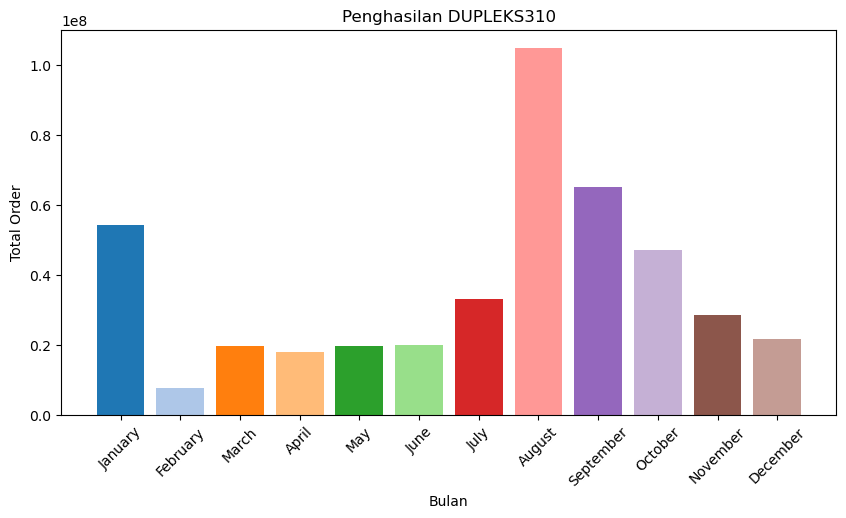

In [265]:
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data3_2.index,
        penghasilan2_periode_data3_2["total_pendapatan"],
        label = penghasilan2_periode_data3_2.index,
        color = colors[:len(penghasilan2_periode_data3_2)])
plt.title("Penghasilan DUPLEKS310")
plt.xlabel("Bulan")
plt.ylabel("Total Order")
plt.xticks(rotation=45)

print(plt.bar)

<function bar at 0x0000018E9BB7BC40>


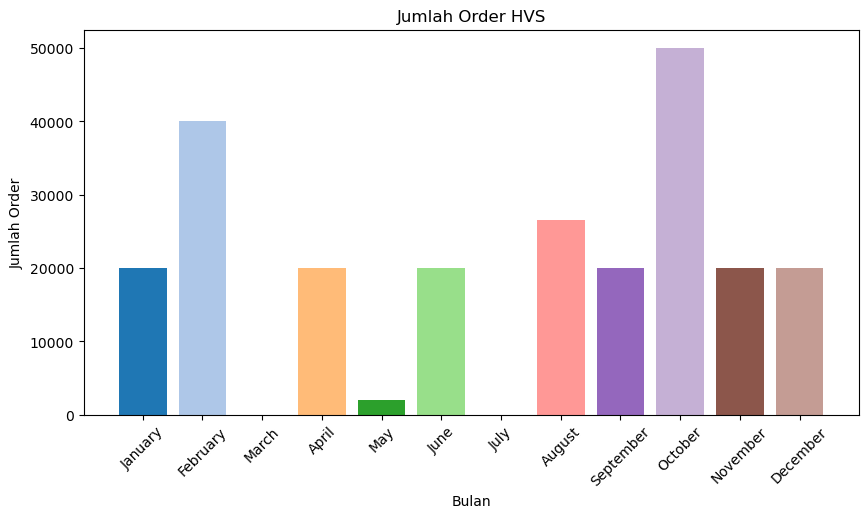

In [264]:
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data4_1.index,
        penghasilan2_periode_data4_1["total_order"],
        label = penghasilan2_periode_data4_1.index,
        color = colors[:len(penghasilan2_periode_data4_1)])
plt.title("Jumlah Order HVS")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)

print(plt.bar)

<function bar at 0x0000018E9BB7BC40>


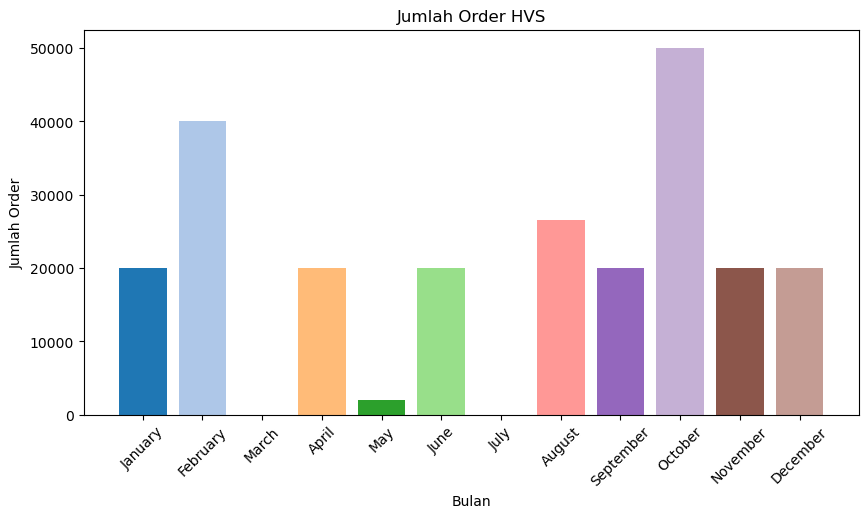

In [267]:
plt.figure(figsize=(10,5))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data4_2.index,
        penghasilan2_periode_data4_2["total_order"],
        label = penghasilan2_periode_data4_2.index,
        color = colors[:len(penghasilan2_periode_data4_2)])
plt.title("Jumlah Order HVS")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)

print(plt.bar)

<function bar at 0x0000018E9BB7BC40>


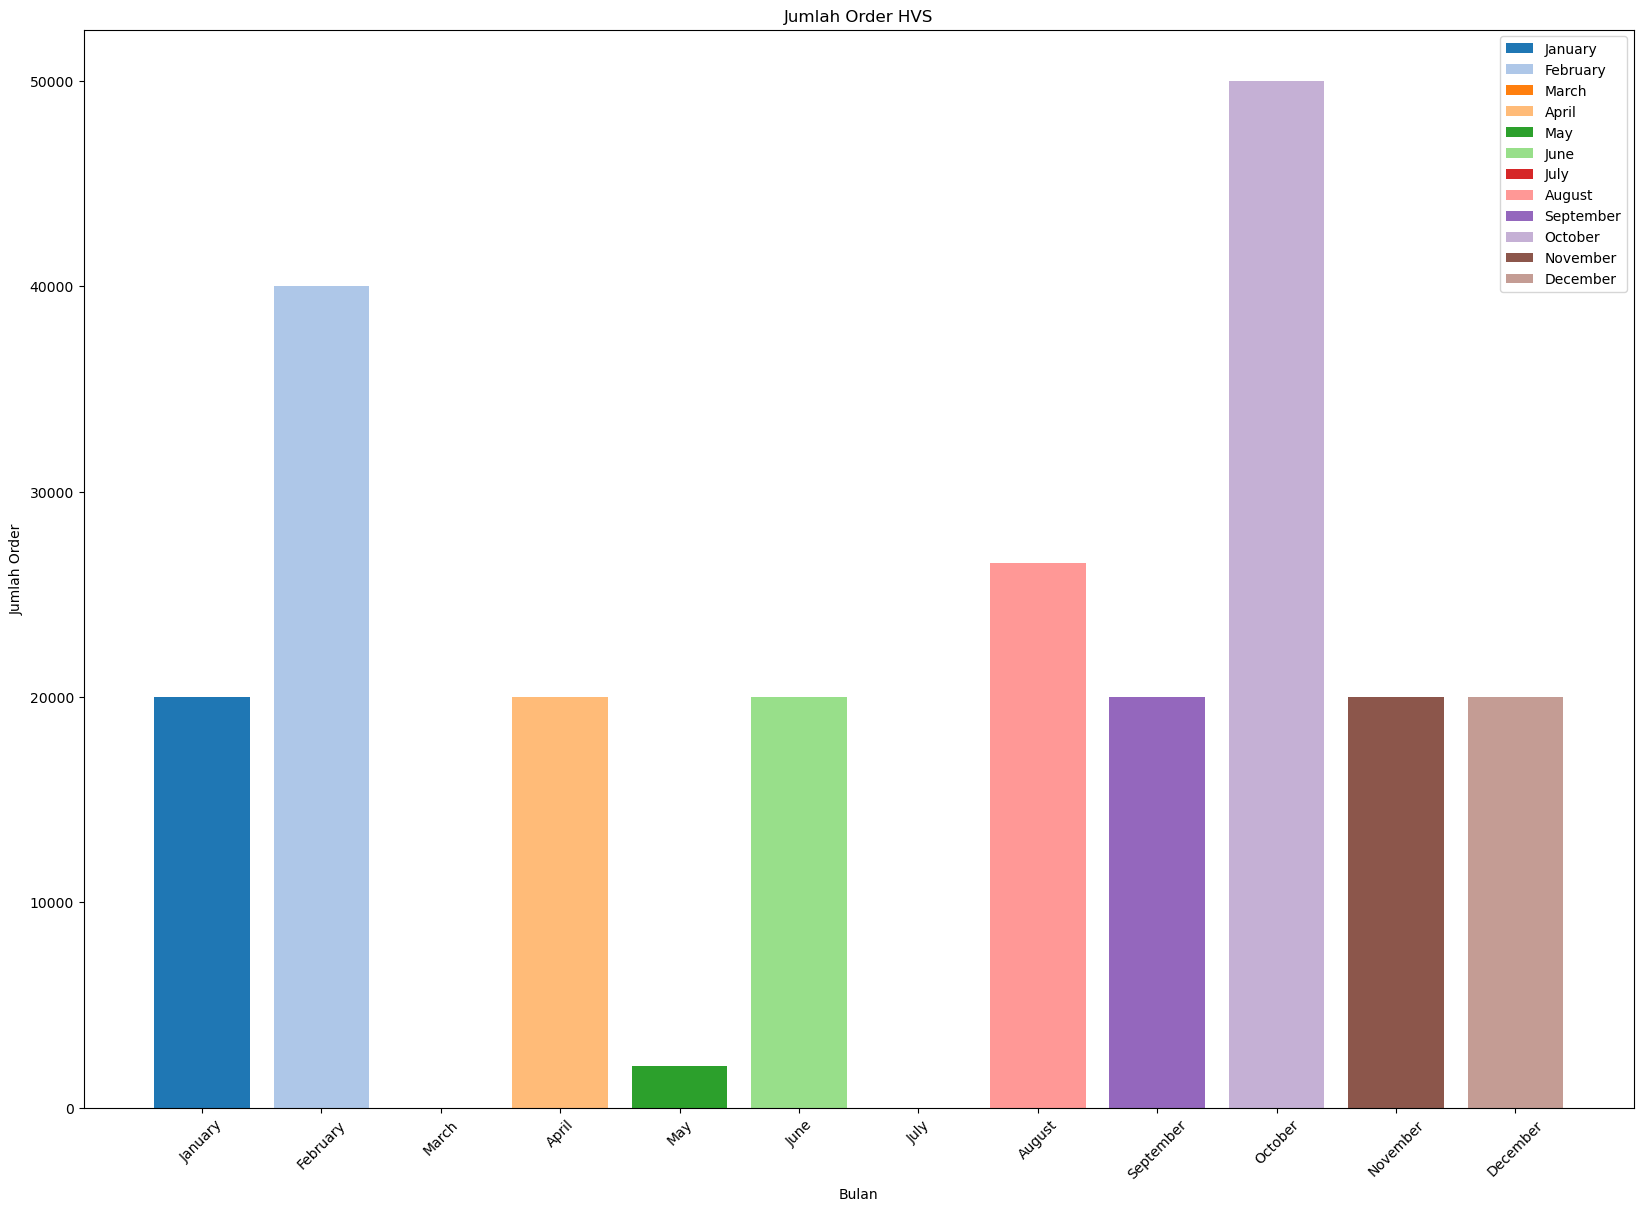

In [270]:
plt.figure(figsize=(20,14))

colors = plt.cm.tab20.colors

plt.bar(penghasilan2_periode_data4_2.index,
        penghasilan2_periode_data4_2["total_order"],
        label = penghasilan2_periode_data4_2.index,
        color = colors[:len(penghasilan2_periode_data4_2)])


plt.title("Jumlah Order HVS")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.legend()
print(plt.bar)